In [1]:
setwd('../')

In [2]:
set.seed(2023)

In [3]:
library('igraph')
library('brainGraph')
library("AnnotationDbi")
library("org.Hs.eg.db")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:igraph’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain 

# 1. Interactome information (Integrated Interaction Database)

In [4]:
interactome <- read.table(file= "data/Networks/InteractomaSinDuplciadosJurisica.csv")
interactome <- graph_from_data_frame(interactome[,1:2],directed = FALSE)
interactome

IGRAPH 9ad59af UN-- 18018 947606 -- 
+ attr: name (v/c)
+ edges from 9ad59af (vertex names):
 [1] 5662--23229  5662--7204   5662--5912   5662--161253 5662--2185  
 [6] 5662--391    5662--7316   5662--9545   5662--27314  5662--5921  
[11] 5662--11033  5662--377    5662--5873   5662--11124  5662--5924  
[16] 5662--53917  5662--57381  5662--10981  5662--6712   5662--4893  
[21] 5662--5868   5662--2159   5662--9364   5662--9826   5662--3265  
[26] 5662--5865   5662--5898   5662--10672  5662--2776   5662--115761
[31] 5662--3845   5662--3925   5662--9265   5662--54509  5662--26034 
[36] 5662--22808  5662--10966  5662--23527  5662--379    5662--387   
+ ... omitted several edges

In [5]:
int_community <- cluster_louvain(interactome)
int_membresia <- membership(int_community)

## 1.1. Number of interactome communities + Nodes per community

In [6]:
length(int_community)

[1] 12

In [7]:
table(int_membresia)

int_membresia
   1    2    3    4    5    6    7    8    9   10   11   12 
 860 1364 5490 1119 2305 2990  301 1294 1268  825  200    2 

## 1.2 Centrality measures for interactome network

### 1.2.1. Interactome degree & betweeness distribution (~ 3 min to calculate betweeness)

In [8]:
int_degree <- igraph::degree(interactome)
Sys.time()
int_betweeness <- igraph::betweenness(interactome, v = V(interactome), directed = F,normalized = T) #Normalized 
Sys.time()

[1] "2023-04-27 17:11:05 CEST"

[1] "2023-04-27 17:14:54 CEST"

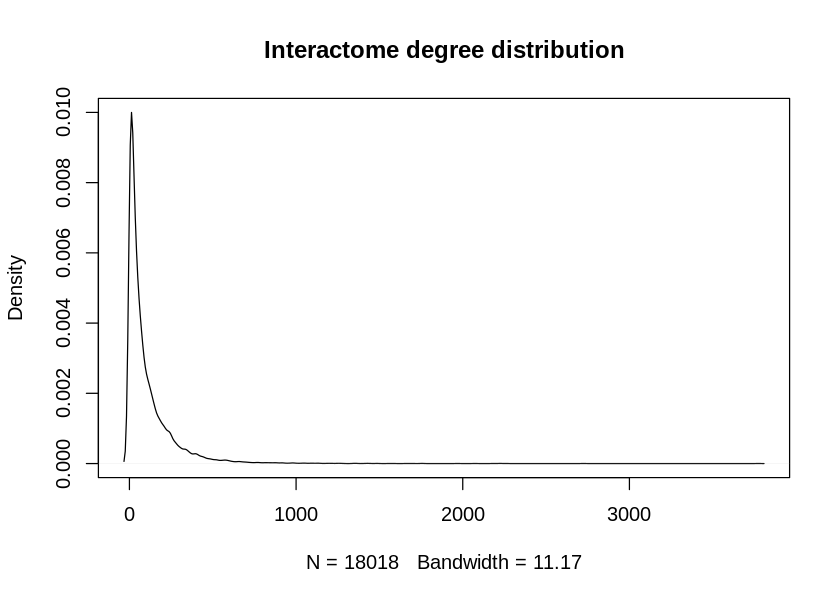

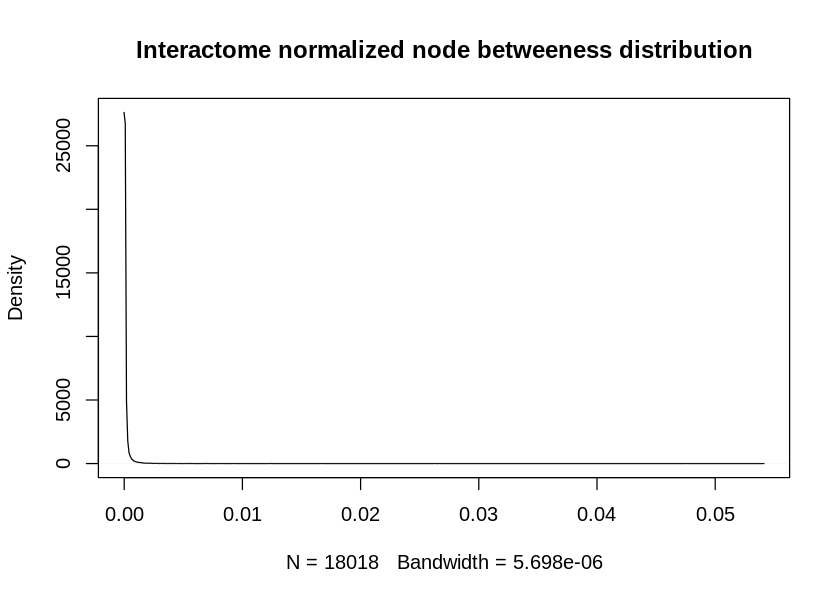

In [9]:
options(repr.plot.width=7, repr.plot.height=5)
plot(density(int_degree),main='Interactome degree distribution')
plot(density(int_betweeness),main='Interactome normalized node betweeness distribution')

In [10]:
# Mapping Gene IDs (Degree)

names_degree <- mapIds(org.Hs.eg.db,keys = names(int_degree),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_degree) <- names_degree

# Mapping Gene IDs (Betweeness)

names_betweeness <- mapIds(org.Hs.eg.db,keys = names(int_betweeness),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
#head(names_degree)
names(int_betweeness) <- names_betweeness

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Top 25 degree

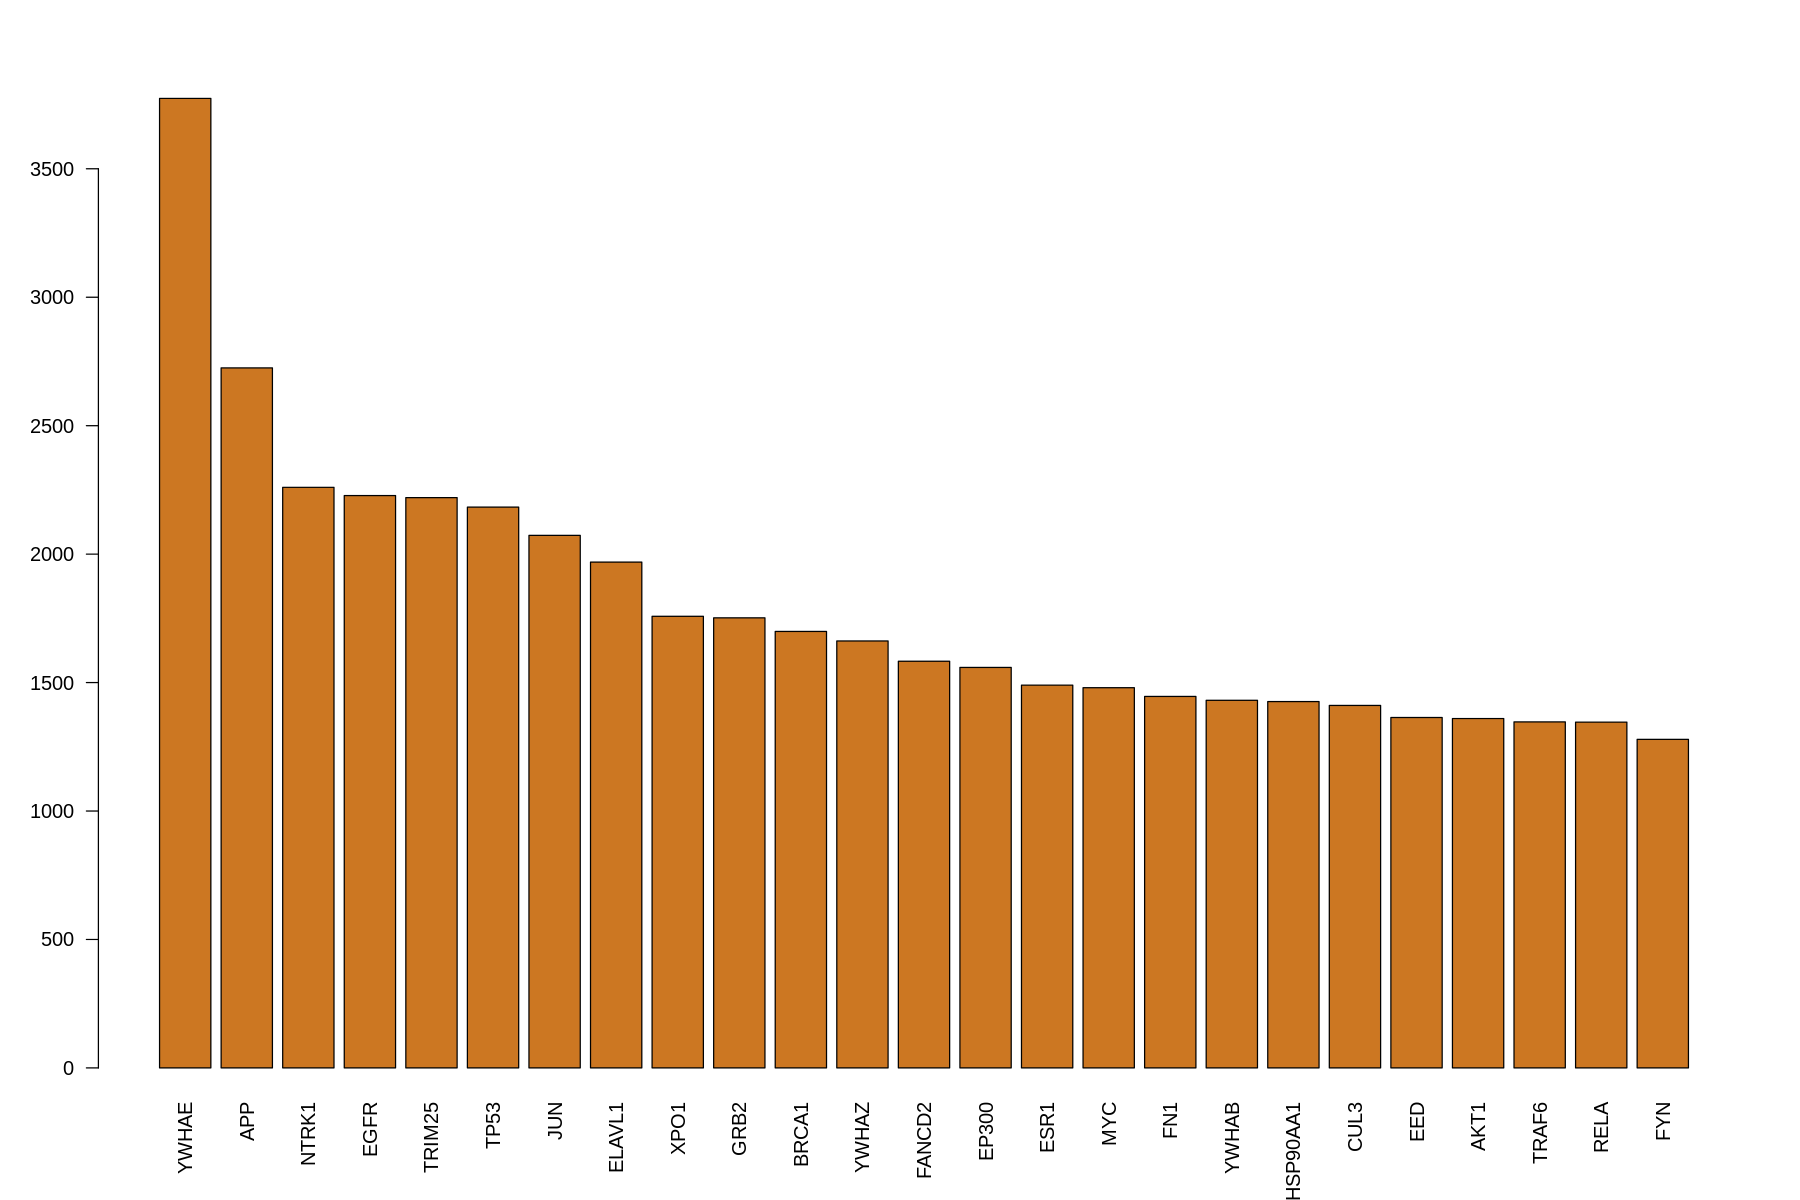

In [11]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_degree,decreasing = T)[1:25],las=2,col = '#CC7722')

#### Top 25 Normalized Betweeness

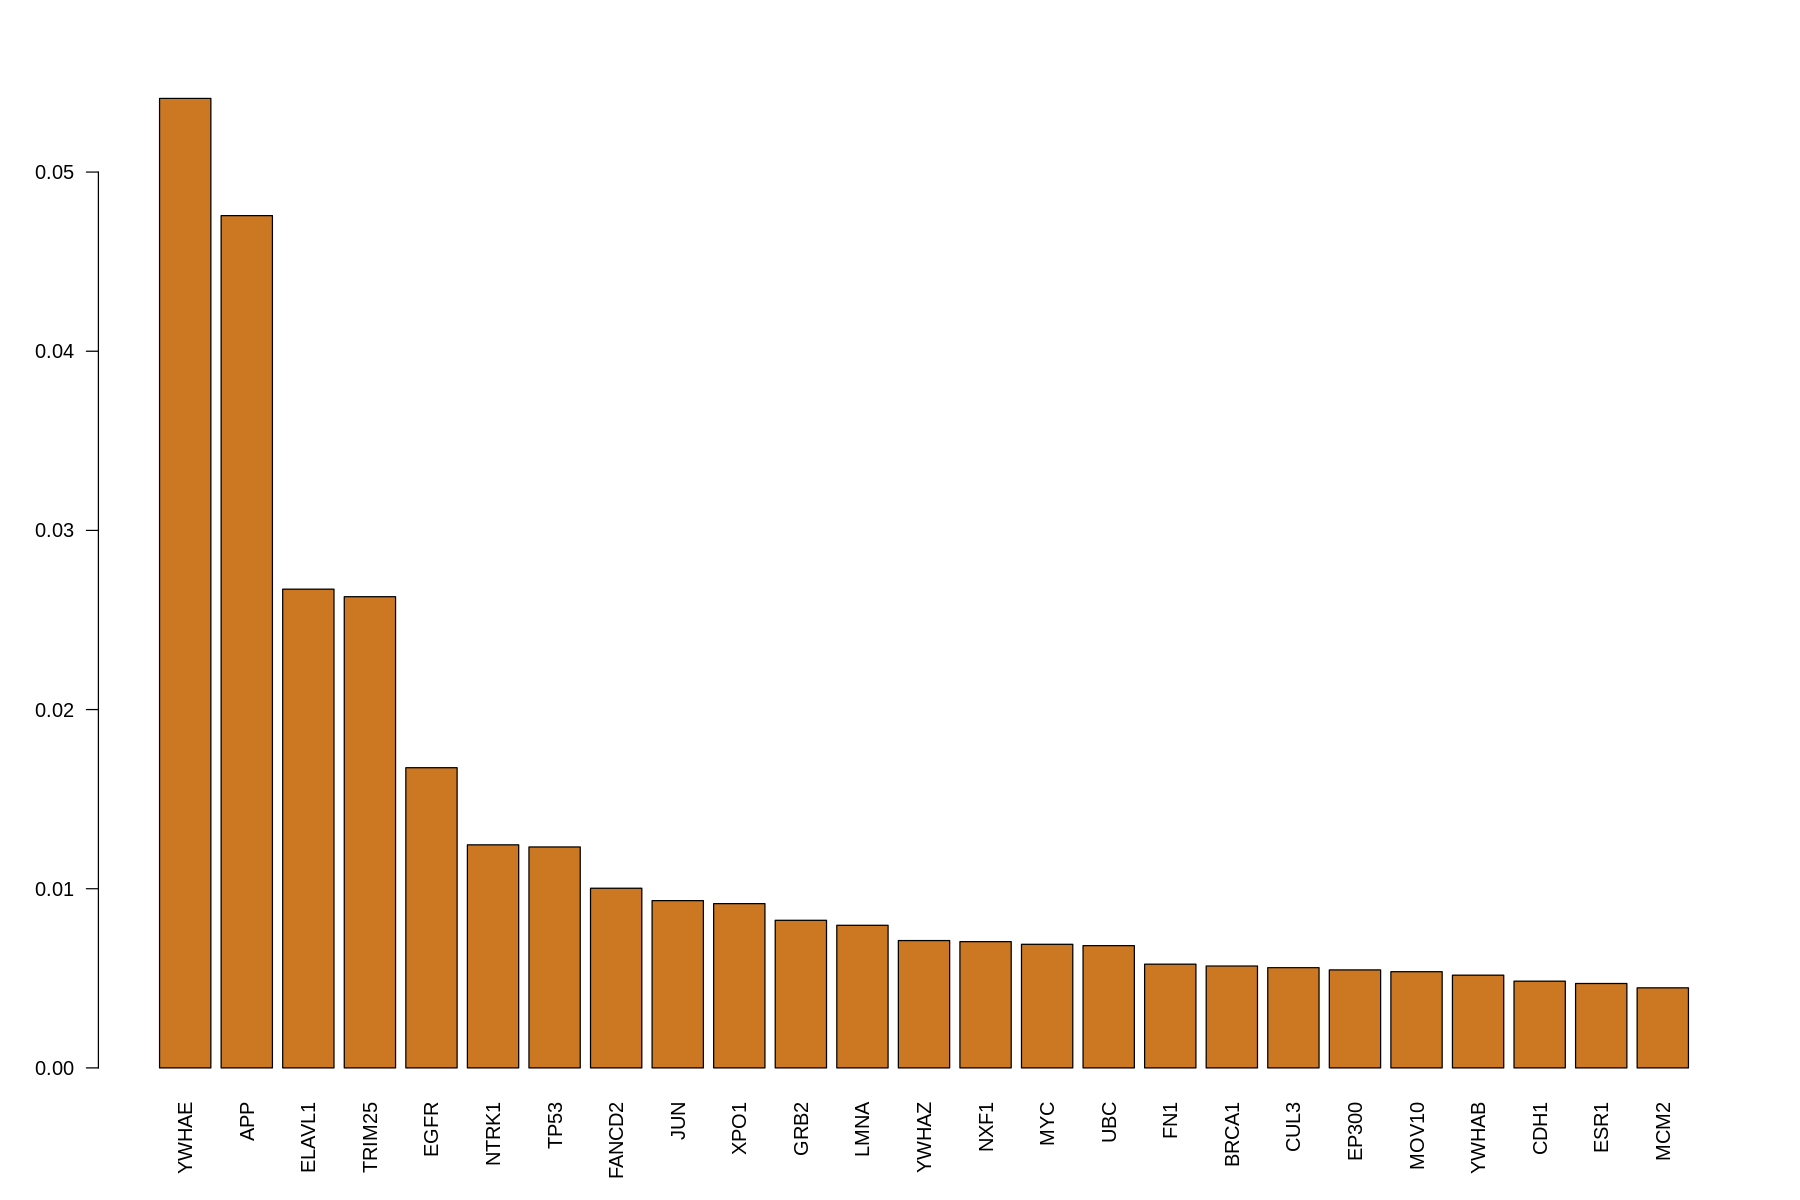

In [12]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_betweeness,decreasing = T)[1:25],las=2,col = '#CC7722')

### 1.2.2. Interactome gateway coefficient and participation coefficient

In [ ]:
Sys.time()
int_part_coeff <- part_coeff(interactome,memb = int_membresia) # ~25 sec
Sys.time()

Sys.time()
int_gateway_deg <- gateway_coeff(interactome,memb= int_membresia,centr = 'degree') # ~28 sec
Sys.time()

Sys.time()
int_gateway_bt <- gateway_coeff(interactome,memb= int_membresia,centr = 'btwn.cent') # ~4 min
Sys.time()

[1] "2023-04-27 17:14:54 CEST"

[1] "2023-04-27 17:15:20 CEST"

[1] "2023-04-27 17:15:20 CEST"

[1] "2023-04-27 17:15:52 CEST"

[1] "2023-04-27 17:15:52 CEST"

In [ ]:
# Mapping Gene IDs (Part coeff)

names_part_coeff <- mapIds(org.Hs.eg.db,keys = names(int_part_coeff),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_part_coeff) <- names_part_coeff


# Mapping Gene IDs (Gateway coefficient -Degree-)

names_gateway_deg <- mapIds(org.Hs.eg.db,keys = names(int_gateway_deg),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_gateway_deg) <- names_gateway_deg

# Mapping Gene IDs (Gateway coefficient -Betwenness-)

names_gateway_bt <- mapIds(org.Hs.eg.db,keys = names(int_gateway_bt),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_gateway_bt) <- names_gateway_bt

#### Participation Coefficient distribution

In [ ]:
plot(density(int_part_coeff),main='Interactome participation coefficient distribution')

#### Top 25 Participation Coefficient

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_part_coeff,decreasing = T)[1:25],las=2,col = '#CC7722')

#### Top 25 Gateway Coefficient (Degree)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_gateway_deg,decreasing = T)[1:25],las=2,col = '#CC7722')

#### Top 25 Gateway Coefficient (Betweness)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_gateway_bt,decreasing = T)[1:25],las=2,col = '#CC7722')

## 1.3 Centrality measures (Degree, betweeness, Participation and Gateway Coefficients) for severe module genes

In [ ]:
interesting_module <- c('PLEC','VCAN','TNXB','LOXL3','LAMB2','LRP4','HSPG2','LAMA5','COL13A1','TNC','USH2A','LAMA2','CHGB','AGRN','COL15A1')

### Degree

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_degree[interesting_module],decreasing = T),las=2,col = '#CC7722')

### Normalized Betweeness

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_betweeness[interesting_module],decreasing = T),las=2,col = '#CC7722')

### Participation Coefficient

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_part_coeff[interesting_module],decreasing = F),las=2,col = '#CC7722')

### Gateway coefficient (Degree)

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_gateway_deg[interesting_module],decreasing = F),las=2,col = '#CC7722')

### Gateway coefficient (Betweeness)

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_gateway_bt[interesting_module],decreasing = F),las=2,col = '#CC7722')

# 2. Reactome Information (Reactome Database)

In [ ]:
reactome <- read.table(file= "data/Networks/ReactomeSinDuplicados.csv")
reactome <- graph_from_data_frame(reactome,directed = FALSE)
reactome

In [ ]:
react_community <- cluster_louvain(reactome)
react_membresia <- membership(react_community)

## 2.1. Number of reactome communities + Nodes per community

In [ ]:
length(react_community)

In [ ]:
table(react_membresia)

## 2.2. Centrality measures for Reactome Network

### 2.2.1. Reactome degree & betweeness distribution (~ 3 min to calculate betweeness)

In [ ]:
react_degree <- igraph::degree(reactome)
Sys.time()
react_betweeness <- igraph::betweenness(reactome, v = V(reactome), directed = F,normalized = T) #Normalized 
Sys.time()

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
plot(density(react_degree),main='Reactome degree distribution')
plot(density(react_betweeness),main='Reactome normalized node betweeness distribution')

In [ ]:
# Mapping Gene IDs (Degree)

names_degree <- mapIds(org.Hs.eg.db,keys = names(react_degree),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_degree) <- names_degree

# Mapping Gene IDs (Betweeness)

names_betweeness <- mapIds(org.Hs.eg.db,keys = names(react_betweeness),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_betweeness) <- names_betweeness

#### Top 25 Degree

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_degree,decreasing = T)[1:25],las=2,col = 'turquoise')

#### Top 25 Normalized Betweeness

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_betweeness,decreasing = T)[1:25],las=2,col = 'turquoise')

### 2.2.2. Reactome gateway coefficient and participation coefficient

In [ ]:
Sys.time()
react_part_coeff <- part_coeff(reactome,memb = react_membresia) # ~25 sec
Sys.time()

Sys.time()
react_gateway_deg <- gateway_coeff(reactome,memb= react_membresia,centr = 'degree') # ~28 sec
Sys.time()

Sys.time()
react_gateway_bt <- gateway_coeff(reactome,memb= react_membresia,centr = 'btwn.cent') # ~4 min
Sys.time()

In [ ]:
# Mapping Gene IDs (Part coeff)

names_part_coeff <- mapIds(org.Hs.eg.db,keys = names(react_part_coeff),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_part_coeff) <- names_part_coeff


# Mapping Gene IDs (Gateway coefficient -Degree-)

names_gateway_deg <- mapIds(org.Hs.eg.db,keys = names(react_gateway_deg),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_gateway_deg) <- names_gateway_deg

# Mapping Gene IDs (Gateway coefficient -Betwenness-)

names_gateway_bt <- mapIds(org.Hs.eg.db,keys = names(react_gateway_bt),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_gateway_bt) <- names_gateway_bt

#### Participation coefficient distribution

In [ ]:
plot(density(react_part_coeff),main='Participation coefficient distribution')

#### Top 25 Participation Coefficient

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_part_coeff,decreasing = T)[1:25],las=2,col = 'turquoise') #These would be the least important in the net

#### Top 25 Gateway Coefficient (Degree)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_deg,decreasing = T)[1:25],las=2,col = 'turquoise')

#### Top 25 Gateway Coefficient (Betweeness)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_bt,decreasing = T)[1:25],las=2,col = 'turquoise')

## 2.3. Reactome centrality measures (Degree, betweeness, Participation and Gateway Coefficients) for severe module genes

### Degree

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_degree[interesting_module],decreasing = T),las=2,col = 'turquoise')

### Normalized Betweeness

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_betweeness[interesting_module],decreasing = T),las=2,col = 'turquoise')

### Participation Coefficient

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_part_coeff[interesting_module],decreasing = F),las=2,col = 'turquoise')

### Gateway Coefficient (Degree)

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_gateway_deg[interesting_module],decreasing = F),las=2,col = 'turquoise')

### Gateway Coefficient (Betweeness)

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_gateway_bt[interesting_module],decreasing = F),las=2,col = 'turquoise')

# 3. Metabolome (Recon3D Virtual Metabolic Human)

In [ ]:
metabolome <- read.table(file= "data/Networks/Recon3DSinDuplicados.csv")
metabolome <- graph_from_data_frame(metabolome,directed = FALSE)
metabolome

In [ ]:
met_community <- cluster_louvain(metabolome)
met_membresia <- membership(met_community)

## 3.1. Number of reactome communities + Nodes per community

In [ ]:
length(met_community)

In [ ]:
table(met_membresia)

## 3.2. Centrality measures for Metabolome Network

### 3.2.1. Metabolome degree & betweeness distribution (~ 3 min to calculate betweeness)

In [ ]:
met_degree <- igraph::degree(metabolome)
Sys.time()
met_betweeness <- igraph::betweenness(metabolome, v = V(metabolome), directed = F,normalized = T) #Normalized 
Sys.time()

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
plot(density(met_degree),main='Metabolome degree distribution')
plot(density(met_betweeness),main='Metabolome normalized node betweeness distribution')

In [ ]:
# Mapping Gene IDs (Degree)

names_degree <- mapIds(org.Hs.eg.db,keys = names(met_degree),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_degree) <- names_degree

# Mapping Gene IDs (Betweeness)

names_betweeness <- mapIds(org.Hs.eg.db,keys = names(met_betweeness),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_betweeness) <- names_betweeness

#### Top 25 Degree

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(met_degree,decreasing = T)[1:25],las=2,col = '#6B8E23')

#### Top 25 Normalized Betweeness

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(met_betweeness,decreasing = T)[1:25],las=2,col = '#6B8E23')

### 1.2.2. Reactome gateway coefficient and participation coefficient

In [ ]:
Sys.time()
met_part_coeff <- part_coeff(metabolome,memb = met_membresia)
Sys.time()

Sys.time()
met_gateway_deg <- gateway_coeff(metabolome,memb= met_membresia,centr = 'degree') 
Sys.time()

Sys.time()
met_gateway_bt <- gateway_coeff(metabolome,memb= met_membresia,centr = 'btwn.cent') 
Sys.time()

In [ ]:
# Mapping Gene IDs (Part coeff)

names_part_coeff <- mapIds(org.Hs.eg.db,keys = names(met_part_coeff),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_part_coeff) <- names_part_coeff


# Mapping Gene IDs (Gateway coefficient -Degree-)

names_gateway_deg <- mapIds(org.Hs.eg.db,keys = names(met_gateway_deg),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_gateway_deg) <- names_gateway_deg

# Mapping Gene IDs (Gateway coefficient -Betwenness-)

names_gateway_bt <- mapIds(org.Hs.eg.db,keys = names(met_gateway_bt),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_gateway_bt) <- names_gateway_bt

#### Participation coefficient distribution

In [ ]:
plot(density(react_part_coeff),main='Participation coefficient distribution')

#### Top 25 Participation Coefficient

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_part_coeff,decreasing = T)[1:25],las=2,col = '#6B8E23') #These would be the least important in the net

#### Top 25 Gateway Coefficient (Degree)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_deg,decreasing = T)[1:25],las=2,col = '#6B8E23')

#### Top 25 Gateway Coefficient (Betweeness)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_bt,decreasing = T)[1:25],las=2,col = '#6B8E23')

## 3.3 Centrality measures for CMS Causal genes (Metabolome network)

The genes found in our module do not exist in this network, meaning the information of the connections in the module are driven by Reactome and Integrated Interaction Database. Nevertheless, we should pinpoint that 6 of the causal genes do exist in this network (as well as some variants from the severe patients , therefore removing this network from the multilayer may yield problems on the discriminating process of some of the multilayer modules.  

Additionally, ACOT2, one of these genes, is marked as potential causal gene of patient 3 severity.

### Load Causal genes

In [ ]:
cosa <- read.csv("data/InputGenes/cmsgenes.csv",header=FALSE) #http://www.musclegenetable.fr/4DACTION/Blob_groupe2
#cosa <- read.csv("data/InputGenes/genespaper.csv",header=FALSE) #Table PMID:30552423
cosa <- cosa[,1]
cosa <- as.character(cosa)
cosa

### Filter to genes in Metabolome network

In [ ]:
cosa <- c(cosa[cosa %in% names(met_degree)],'ACOT2','ATP6V0A4','SLC28A1','AMPD1','CHIT1','CES5A') #We additionally put ACOT2, the suspicious gene of patient 3,
# as well as genes found in the communities presented in supplementary figure 3 (Severe, metabolome)

## 3.3. Metabolome centrality measures (Degree, betweeness, Participation and Gateway Coefficients) for severe module genes

### Degree

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_degree[cosa],decreasing = T),las=2,col = '#6B8E23')

### Normalized Betweeness

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_betweeness[cosa],decreasing = T),las=2,col = '#6B8E23')

### Participation Coefficient

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_part_coeff[cosa],decreasing = F),las=2,col = '#6B8E23')

### Gateway Coefficient (Degree)

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_gateway_deg[cosa],decreasing = F),las=2,col = '#6B8E23')

### Gateway Coefficient (Betweeness)

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_gateway_bt[cosa],decreasing = F),las=2,col = '#6B8E23')

In [ ]:
library(VennDiagram)

In [ ]:
library(tidyverse)

### Edge Overlap

In [ ]:
grid.newpage()
draw.triple.venn(area1 = length(E(interactome)), 
                 area2 = length(E(reactome)), 
                 area3 = length(E(metabolome)), 
                 n12 = length(E(igraph::intersection(interactome,reactome))),
                 n23 = length(E(igraph::intersection(metabolome,reactome))), 
                 n13 = length(E(igraph::intersection(interactome,metabolome))),
                 n123 = length(E(igraph::intersection(interactome,reactome,metabolome))),
                 category = c("IID", "Reactome", "Virtual Metabolic Human"), lty = "blank", 
                 fill = c(alpha('#fde725ff',0.3), alpha('#21908dff',0.3),alpha("#440154ff",0.3)),
                 col=c("#440154ff", '#21908dff', '#fde725ff'),
                 fontfamily='sans',
                 cex=1)

### Node Overlap

In [ ]:
grid.newpage()
draw.triple.venn(area1 = length(V(interactome)), 
                 area2 = length(V(reactome)), 
                 area3 = length(V(metabolome)), 
                 n12 = length(intersect(V(interactome)$name,V(reactome)$name)),
                 n23 = length(intersect(V(metabolome)$name,V(reactome)$name)), 
                 n13 = length(intersect(V(interactome)$name,V(metabolome)$name)),
                 n123 = length(Reduce(intersect, list(V(interactome)$name,V(reactome)$name,V(metabolome)$name))),
                 category = c("IID", "Reactome", "Virtual Metabolic Human"), lty = "blank", 
                 fill = c(alpha('#fde725ff',0.3), alpha('#21908dff',0.3),alpha("#440154ff",0.3)),
                 col=c("#440154ff", '#21908dff', '#fde725ff'),
                 fontfamily='sans',
                 cex=1)